In [164]:
from numpy import *
from matplotlib.pyplot import *

In [165]:
def random_array(length):
    return [random.choice([-1, 0, 1]) for _ in range(length)]


In [152]:
num_steps= [10,20,50,100,500,1000]
deviation = zeros(len(num_steps))

for i in range(len(num_steps)):
    n = num_steps[i]
    for im in range(n):
        x = cumsum(random_array(n))
        xdev = std(x)**2
        deviation[i]+=xdev
    deviation[i] = deviation[i]/(n)

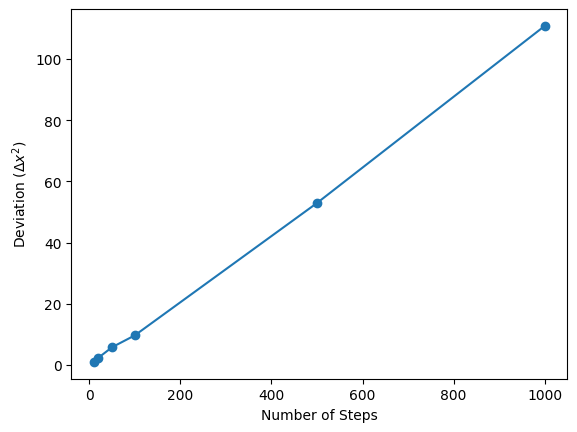

In [159]:
plot(num_steps,deviation,'-o')
ylabel('Deviation ($\Delta x^2$)')
xlabel('Number of Steps')
show()

/tmp/ipykernel_461/2290970763.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[iw] = x[iw] + dx


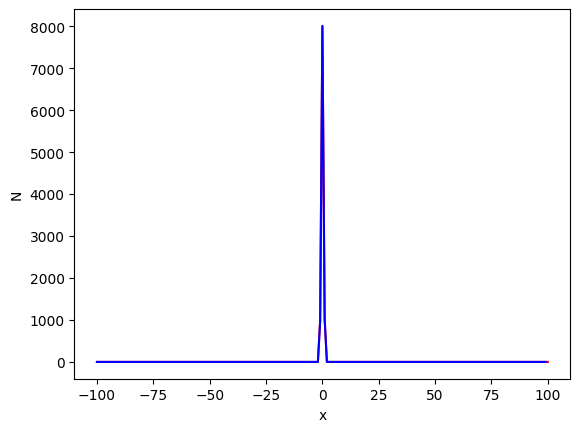

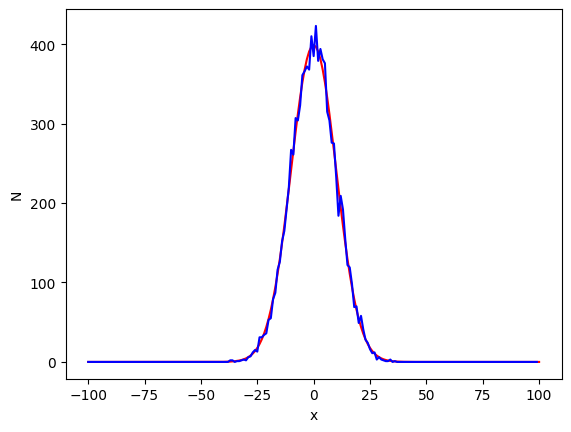

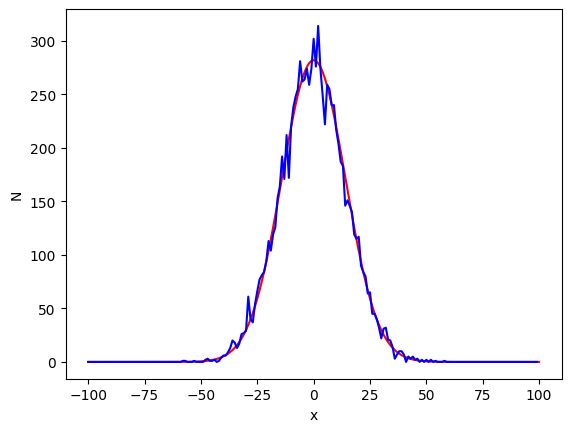

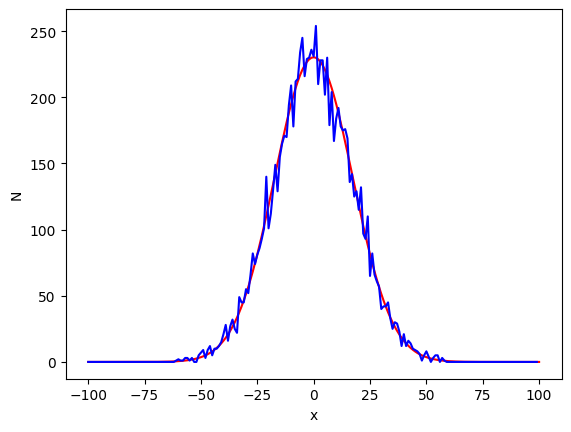

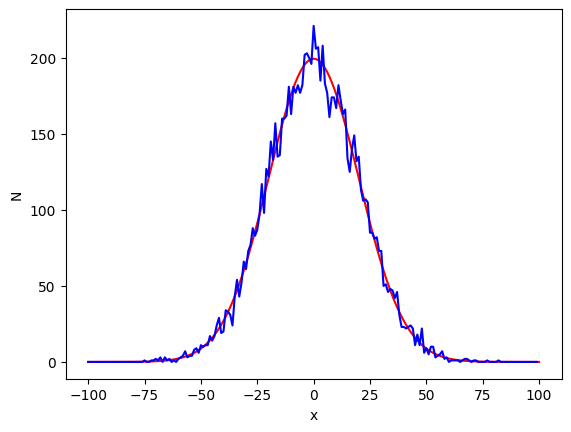

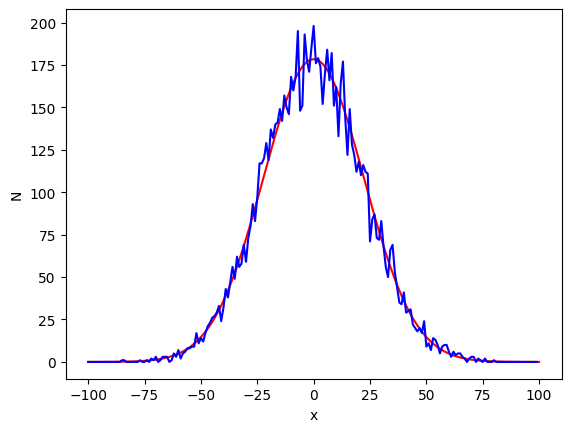

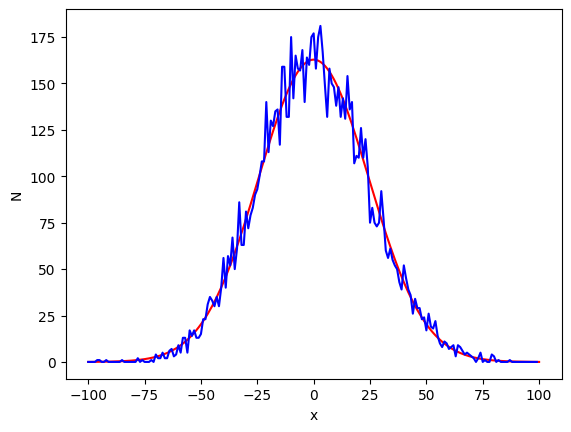

In [194]:
from pylab import *

M = 10000  # number of walkers
L = 100    # max size of lattice

# each time step - move walkers and propagate diffusion solution
p = 0.1    # prob for motion
pinv = 1.0 - p
nsteps = 3001  # number of steps

# initializing walkers
x = zeros(M)  # init posn of walkers
edges = array(range(-L, L + 1)) - 0.5
xc = 0.5 * (edges[:-1] + edges[1:])

# init concentrations
c = zeros((2 * L + 1, 2))
i0 = 0
i1 = 1
c[L] = M  # c[L] corresponds to x = 0
cx = range(-L, L + 1)
D = p
ion()
noutput = 500

for it in range(nsteps):
    # first update posn of all random walkers
    for iw in range(M):
        rnd = rand(1)
        dx = -1 * (rnd < p) + 1 * (rnd > pinv)
        x[iw] = x[iw] + dx

    # perform explicit step for diffusion equation
    for ix in range(1, len(c) - 1):
        # use i0 and generate i1
        c[ix, i1] = c[ix, i0] + D * (c[ix - 1, i0] - 2 * c[ix, i0] + c[ix + 1, i0])

    # flip i0 and i1
    ii = i1
    i1 = i0
    i0 = ii

    # plot the two concentrations now
    if mod(it, noutput) == 0:
        Nx, e = histogram(x, edges)
        clf()
        plot(cx, c[:, i0], '-r', xc, Nx, '-b')
        xlabel('x'), ylabel('N'), pause(0.001)